<a href="https://colab.research.google.com/github/iabrilcabezas/astroPythonProject/blob/main/TheSun/1_Sunspots_year_frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Investigating the Periodicity of Sunspots


Note: This notebook was originally produced as part of the work done under the project Astronomía Accesible (http://astroaccesible.iaa.es/). It can be found here: https://github.com/iabrilcabezas/AstroAccesible/tree/main/Sun <br>

It will now be adapted to be used in the astroPython learning project.<br>

The notebook uses data from the SILSO data/image $-$ Royal Observatory of Belgium, Brussels (http://sidc.be/silso/home), to study the solar activity's frequency. It is known to be approximately 11 years. We will calculate this explicitly.

In this notebook we will learn how to:

* Import packages
* Read data from a file that is stored in a webpage
* Select the data within that file we are the most interested in
* Make a plot
* Perform a Fourier analysis (advanced)

##1a. Why Sunspots?

The Sun is a *star*, an object bound by self-gravity, emitting vast amounts of energy. The emitted energy is produced within the Sun's core by a process called *hydrogen fusion*.  The energy produced by hydrogen fusion is transported to the surface, where it is ultimately *radiated* into space.

As its name suggests, the critical ingredient we need for hydrogen fusion to take place is elemental hydrogen. Cecilia Payne-Gaposchkin, while a PhD student at the Harvard Observatory, is the scientist who discovered that hydrogen was indeed the most abundant element in stars. Her discovery is central to the entire field of astrophysics, not only because it determined what stars are mainly made of, but also because it determined what *ordinary matter* in the Universe is mainly made of.

Like Professor Payne-Gaposchkin, present-day astrophysicists believe the study of stars is crucial to an understanding of the properties and evolution of our Universe. This belief motivates detailed studies of our Sun: it is the closest laboratory we have to analyse general processes that occur across the whole cosmos.

Imagine an experiment in which we measure the *radiant flux* (the energy emitted per unit area and time) of the Sun's *photosphere*, the lowest layer of the Sun's atmosphere. To our surprise, we find that the flux across the photosphere is far from uniform. Rather there are small regions, *umbras* and *penumbras*, where the flux is only a fraction of what it is at most in other locations. We have discovered sunspots! Actually, the credit goes to Galileo Galllei, but he won't mind if we enjoy our discovery also.

Sunspots are intersting creatures. They never cover more than 1% of the Sun’s surface, their sizes vary between 500 and 100,000 kilometers, their lifespan is varies widely and unpredictably (between less than an hour to several months), and they always appear in pairs which are oriented parallel to the solar equator.

The structure and evolution of sunspots turns out to reveal many things about what is going on in the deeper layers of the Sun, specifically the *convection zone*, at any given moment. In particular, they indicate changes in the shape of enormous and enormously strong *magnetic fields*. Those fields are produced by, and influence, the flows of charged matter (*plasma*) in the Sun's convection zone and, beyond the photosphere, in the surrounding *chromosphere*.

![Sunspots example](https://sdo.gsfc.nasa.gov/assets/img/browse/2014/10/24/20141024_011500_512_HMIIC.jpg)

Figure 1: Image of the Sun's photosphere taken on the 24 October 2014. A very prominent pair of sunspots appear in the center of the southern hemisphere. Their color is darker because the flux emerging from them is lower than that of their surroundings. Credit: Courtesy of NASA/SDO and the AIA, EVE, and HMI science teams

You can check how the Sun looks today here: https://sdo.gsfc.nasa.gov/data/

It turns out that sunspots are only one element of a wider family of phenomena to which we refer as “solar activity”, a collection of phenomena including *flares*, *coronal mass ejections*, also known as *CME*, or *prominences*. CMEs can be very violent and can lead to satellite failures and seriously disrupt the global electrical infrastructure.

[![CME 23/07/2012](https://svs.gsfc.nasa.gov/vis/a010000/a012100/a012142/s3-1024_print.jpg)](https://svs.gsfc.nasa.gov/vis/a000000/a004100/a004167/2012July_2AU.1080x1080.mp4 "CME 23/07/2012")
Video 1: On July 23, 2012, a very dangerous CME event occured (click on the image to visualize the video &mdash; a new tab will open). The Sun ejected great amounts of particles at very high speeds. The event could have seriously disrupted the global electrical infrastructure if the Earth had been in its path. Credit: NASA's Scientific Visualization Studio, the Space Weather Research Center (SWRC), the Community-Coordinated Modeling Center (CCMC), Enlil and Dusan Odstrcil (GMU), Leila Mays (CUA) and Janet Luhmann (UCB) and NASA's Scientific Visualization Studio. (https://svs.gsfc.nasa.gov/4167)

Wow! That was a close one! Is there any way we might be able to predict the next period of high solar activity? At least that way we would be able to know when we need to be most alert to possible effects on Earth. A good place to start is to look for patterns (*periodicities*) in solar activity over time. We can do that by analyzing sunspot data using the world's friendliest programming language, *Python*.

## 1b. Importing Python Resources




One of the really great things about Python is the community of people who use it. They include a lot of scientists, working in fields from biology to astronomy, and they are very generous. They want to share their knowledge and ideas.  That's why a lot of them became scientists in the first place.

The main way people in the Python community share their work is to write and publish *packages*. Packages are blocks of Python code that define various *functions*, *objects* and *methods*. For now, let's just call them *resources*. Once your programming *environment* has been step up properly, it's easy to access and use packages in your programs.

Google's Colab (the programming environment you are in right now) gives you very easy access to many useful Python packages. These include packages for doing various kinds of data analysis, plotting graphs and even accessing astronomical data. All you have to do is use the built-in Python function `import` followed by the name of the package and, sometimes, the specific tool. That's why people say: "Oh, to do that, you really should import the `astropy` package."

Over the years, people in the Python community have published over 200,000 packages (!) and the Colab enviornment can't include them all. It includes several and getting access to all the others is not especially difficult, you just have add them to your programming environment. More about that later.

In the meantime, let's just import some packages that are already part of the Colab environment.  For our work on sunspots, we will need resources from five Python packages:`numpy`, `matplotlib`, `scipy`, `urllib` and `astropy`. The `numpy` package is a favorite of data scientists because it contains resources that let you create and manipulate *arrays* of numbers. The package `matplotlib` was the first one created to visualize data, and it is the most widely-used within the community to make plots. The `scipy` package, whose name stands for "Scientific Python", contains loads of numerical recipes. We will use it specifically to discover periodicity within our data thanks to a mathematical tool called "Fourier Transform". The package `urllib` contains routines so that we can work with webpages. The `astropy` package was written by astronomers. It includes very speciallized tools for retrieving and analyzing astronomical data.

The Python code, below, imports the resources we need from each of the five packages. How we do that varies a little from package to package, depending upon our specific needs.

For example, from the `matplotlib` we need a resource called  `rcParams` that cares about how our plots will look (e.g. fontsize of the axis labels). To save memory and improve processing speed, we will just import that one resource by writing:

`from matplotlib import rcParams`

Note: because this is a *text cell* this line of code, like the others in this discussion, does not execute like the code in *code cells*. It's just for you to read.

Sometimes, resources are kept in separate *directories*, like the `request` directory of `urllib`. That's why we have to write:

`from urllib.request import urlopen`

After importing a resource, you can use the resource just like it was any of Python's built-in resources. For example, a very important method in the numpy package is `array`. We can import numpy and use this method just by writing:

>```
import numpy
array(eggs)
```

But what if the name of the imported resource has the same name as something else in your program? You'd be surprised how often that happens! To avoid such confusion, we write:

>```
import numpy as np
np.array(eggs)
```

We will use this way of naming directories to import the most powerful resource that `matplotlib` offers us to plot our data, and that is kept in a separate *directory* called `pyplot`:

>```
import matplotlib.pyplot as plt
```

So now we are ready to import the packages and resouces we need. To run (*execute*) this code, hover over it with the cursor and click the play triangle located at the top left of the *cell* (pieces of code in the Colab environment are organised in cells). You can also use the keyboard shortcut `Shift + Enter`

In [ ]:
from matplotlib import rcParams
import matplotlib.pyplot as plt

from urllib.request import urlopen
from astropy.table import Table
from scipy.signal import find_peaks
from scipy.fftpack import fft, fftfreq
import numpy as np

If that code ran without getting feedback from Python, it's good news. It means the Python interpreter found the packages and the specific resources without encountering any problems. Try making a small change to the code, above and run it again, just to see what happens when something goes wrong.

## 1c Using Imported Python Resources

Next we will use (the technical term is *call*) one of the methods in we imported, namely `rcParams`. It's just something we are doing to make our graphs look nice. Actually, we are calling the method six times.

In [ ]:
rcParams['font.size']=20
rcParams['axes.linewidth']=1.5
rcParams['xtick.major.width']=1.5
rcParams['xtick.minor.width']=1.5
rcParams['ytick.major.width']=1.5
rcParams['ytick.minor.width']=1.5

##1d Closing in on the Sunspot Data

As mentioned above, we want to get data on the number of sunspots observed per year for every year going back as far as we can. And we are going to get that data from the SILSO (Sunspot Index and Long-term Solar Observations) database at the Royal Observatory of Belgium (ROB), Brussels. No passport required!

How do we get the data we need specifically? One answer is to go to the SILSO-ROB website (http://www.sidc.be/silso/) and find out what we can about the content and structure of their database. When we do, we learn that this is a center "for the production, preservation and dissemination of the international sunspot number". They distribute the daily sunspot number in a variety of forms and their data covers different time periods: daily total sunspot number (from January 1, 1818 till now), yearly mean total sunspot number (from the year 1700 till now), monthly mean North-South hemispheric sunspot number (from January 1992 until now), etc. Check it for yourself [here](http://www.sidc.be/silso/datafiles)!

We will be working with the yearly mean total sunspot number, because it is the data that goes the farthest in time, and because, as we'll see, years is a proper unit to measure the sunspot cycle (as opposed to, for example, seconds or centuries!). The url for the data is http://sidc.oma.be/silso/DATA/SN_y_tot_V2.0.txt. Click on this link and you will see the data in its native environment.

What do these numbers mean? Well, according to the SILSO-ROB website its content is organised as follows:

Column 1: Time, measured in years of the gregorian calendar, the sunspot number refers to

Column 2: Yearly mean total sunspot number, that is: total number of sunspots that occured every day, divided by the number of days they were able to observe the Sun during a whole year

Column 3: Precision with which the sunspot number was measured. The smaller this number, the better the observation was performed. It is important to notice that every measurement a scientist performs has some error associated to it (because nobody and no instrument is perfect!)

Column 4: Number of observations used to compute the yearly mean total sunspot number

Column 5: Definitive/provisional marker. A blank indicates that the value is definitive. A '*' symbol indicates that the yearly average still contains provisional daily values and is subject to a possible revision. This is the case for the last period recorded, 2020 - 2021, which corresponds to the last row of the file (where Column 1 = 2020.5)






So now we are ready to run code that pulls down from ROB the data we need for our sunspot analysis. The code uses the `urllib.request` method `urlopen` to create an *object* we are calling `file` (we could have called it anything). Once we do that, we can use the name `file` any time we want to do something with the downloaded data.

The first thing we do with the downloaded data is to pull out the information we need in the form of a `numpy` array, an object we are calling `data`. We do this using a `numpy` method called `genfromtxt`. The object `file` is an *argument* to the `genfromtxt` call. The other argument is a message to `genfromtxt` not to include the last line (`skip_footer = 1`) in the downloaded data. As the comment indicates, the footer contains predictive information we don't need right now (as we mentioned earlier, this row has a marker * in Column 5). If we had wanted to ignore the last 3 lines, we should have written `skip_footer = 3`.


In [ ]:
file = urlopen('http://sidc.oma.be/silso/DATA/SN_y_tot_V2.0.txt')
data = np.genfromtxt(file, skip_footer = 1) # the last row on this file is a prediction, so we will ignore it

Now that we have our data in the form of a `numpy` array, we can easily do all kinds of useful and fun things with it. First, let's see what it looks like.

In [ ]:
print(data)

[[ 1.7005e+03  8.3000e+00 -1.0000e+00 -1.0000e+00]
 [ 1.7015e+03  1.8300e+01 -1.0000e+00 -1.0000e+00]
 [ 1.7025e+03  2.6700e+01 -1.0000e+00 -1.0000e+00]
 ...
 [ 2.0175e+03  2.1700e+01  2.5000e+00  1.1444e+04]
 [ 2.0185e+03  7.0000e+00  1.1000e+00  1.2611e+04]
 [ 2.0195e+03  3.6000e+00  5.0000e-01  1.2884e+04]]


This is typical of what you see when you `print` a `numpy` array. You don't see the whole array, just the begining and the end, enough to understand the content the structure of the array.

In the case the array has many *rows*, each row having four *columns*. We already know from the website documentation that the first column is the year we measured the sunspot number, the second is the yearly mean total sunspot number, the third is the error we made in this measurement and the last one is the number of days we were able to measure the sunspot number. When the information is not available, instead of leaving it blank, the number is set to "-1".

By default, all the numbers in the array are displayed in *scientific notation*. And the years end with $0.5$ because it indicates the mid-year date. For example, the period $1700 - 1701$ is represented by $1700.5$, and is displayed as `1.7005+03`, that is, $1.7005 \cdot 10^3$. Tricky.

Because we want to plot the number of observed sunspots data vs the year of observation, we want to create a one-collumn array called `time` that is just a list of the years. We will use that array as our x-axis. We do that with a Python function called a *slice*. The syntax of slices is a little strange. Here are some examples to run.

In [ ]:
eggs = np.array([[2020,120,1.30],[2021,121,1.31],[2022,122,1.32]])
print(eggs[0,0])
print(eggs[0,1])
print(eggs[0,2])
print(eggs[1,0])
print(eggs[1,1])
print(eggs[1,2])
print(eggs[2,0])
print(eggs[2,1])
print(eggs[2,2])
print(eggs[:,0]) # print column 0
print(eggs[:,1]) # print column 1
print(eggs[:,2]) # print column 2
print(eggs[0,:]) # print row 0
print(eggs[1,:]) # print row 1
print(eggs[2,:]) # print row 2

2020.0
120.0
1.3
2021.0
121.0
1.31
2022.0
122.0
1.32
[2020. 2021. 2022.]
[120. 121. 122.]
[1.3  1.31 1.32]
[2.02e+03 1.20e+02 1.30e+00]
[2.021e+03 1.210e+02 1.310e+00]
[2.022e+03 1.220e+02 1.320e+00]


IMPORTANT NOTE: Python numbers the elements of an array starting from 0, instead of 1. That is, the first element of an array is accessed using the index 0.

So let's use slicing to make our x-axis (when the observation was made, expressed in mid-years), as well as our y-axis (the number of sunspots for each observation).

In [ ]:
time = data[:,0]     # time column [years]
sunspots = data[:,1] # Yearly mean total sunspot number

##1e Drawing a Sunspot vs. Time Graph

Now we draw our graph, using a couple of `matplotlib.pyplot` methods. The method `plt.figure` creates the graph space we will name `fig`, `subplot` can divide that space into multiple smaller graphs (we only want one, which we will name `ax`).

Notice how the syntax works. We created a `figure`-type object using `plt.figure`, specifying an important *property* of that object, namely, its size. It turns out that `figure` objects have their own methods, things they can do as well as properties they have. One of these methods is `subplots`, which divides the plot space into smaller parts. Our object `fig`, an *instance* of the object-type `figure`, *inherits* the `subplots` methods. That allows `fig` to create subplots on its own. We call the `subplots` method of our `figure`-type object `fig` by writing:

>```
ax = fig.subplots()
```

This creates another object, `ax` which is a paticular `subplots`-type object.
In this particular case, there are no subplots, that's why the parens are empty.


Naturally, `subplots`-type objects have their own methods, which are inherited by `ax` since it is an instance of `subplots`. Those methods include `plot` which plots data within the subplot. We are calling `plot` with a couple of arguments: the x-axis data (`time`) the y-axis data (`sunspots`) the color of the line (`k` means black) and its width. `set_xlabel` with creates an x-axis label and `set_ylabel` which sets the y-axis lable.

It turns out that `matplotlib.pyplot` objects `figure` and `subplots` objects have lots of other methods. Calling these methods allow you to create amazing graphs that look exactly the way you want them to.

Finally, the `matplotlib.pyplot` method `show` displays the graph. Note we call that method using `plt.show()` because we imported `matplotlib.pyplot` with the code:
>```
import matplotlib.pyplot as plt
```

In this case, our graph is very simple (elegant).

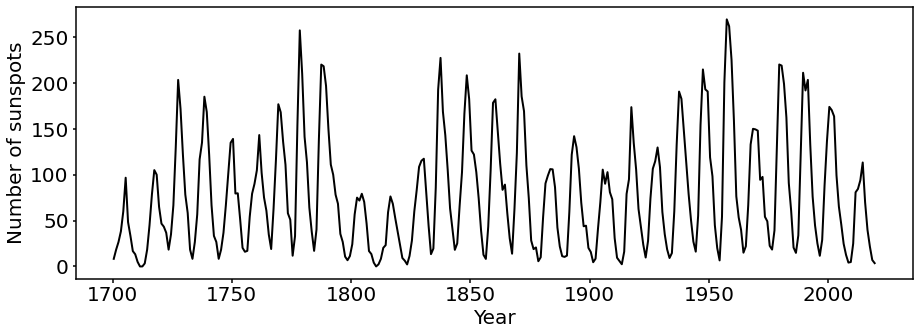

In [ ]:
rcParams['ytick.minor.width']=1.5

fig = plt.figure(figsize = (15,5))
ax = fig.subplots()

ax.plot(time, sunspots, color = 'k', linewidth = 2)
ax.set_xlabel('Year')
ax.set_ylabel('Number of sunspots')
plt.show()

##1f Finding the Dominant Period

Just looking at this graph one can see hints of periodicity (repeating patterns) at a number of time scales. We can already see by eye that, approximately every 10 years, a cycle (no sunspots &#8594; maximum number of sunspots &#8594; no sunspots) is completed. We can explore those periodicities rigurously by performing what is called a *fast Fourier transform*, a powerful mathematical process that breaks a complex pattern of variation into discrete *sinusoidal components*. Each component has a particular *frequency* and *amplitude*. The amplitude is the relative contribution a given frequency makes to the overall pattern of variation.

Performing an FFT by hand (the way Fourier did it in the late 18th century) is quite difficult, but our friend `numpy` has a method (`fft`) that does the work for us. We call the `fft` method on the array `sunspots` and take the absolute value of the amplitudes by running this code:

In [ ]:
# Compute periodicity of the data:

# Fourier transform the sunspots data:
fourier_amplitudes = np.abs(fft(sunspots))

We have stored the output of the method `fft` in `fourier_amplitudes`, a  list of component amplitudes in order of increasing component frequency. We search for the *index* (row number) of the frequency with the largest amplitude using the `numpy` method `argmax`. It turns out the zeroth term (the first row) in `fourier_amplitudes` just sets the *phase* of the periodicity (where the variation starts in the cycle) so we don't want to include that value in the list of amplitudes when we look for the maximum. Excluding that value shifts the row numbering by one, so we have to correct for that. The code is:

In [ ]:
# Obtain the index of the maximum amplitude (excluding the first amplitude)
index_max_amplitude = np.argmax(fourier_amplitudes[1:])+1 # +1 to get correct indexing because we are excluding the zeroth
print(index_max_amplitude)

29


So we now we know the index (row number) of the maximum amplitude, but what frequency corresponds to that index? We find out by running the `numpy` method `fftfreq`.  The arguments of `fftfreq` are the number of observations and the observation-to-observation time interval. The number of observations `N` is just the `size` of the `sunspots` array, and the time interval is the difference between any two values in the `time` array. We obtain those to values, and run `fftfreq` with this code:

In [ ]:
# Obtain the corresponding period:
N = sunspots.size # number of observations (array size of sunspots )
dt = time[1] - time[0] # time interval between observations
print("N = " + str(N) + ", dt = " + str(dt))
fourier_freqs = fftfreq(N, d = dt)    # frequency [1/year] for each fourier coefficient

N = 320, dt = 1.0


This makes sense, right? We have 320 observations (`N = 320`, from the year 1700 until 2020), and the time interval between them (`dt`) is 1 year.

Recall the the period $T$ is related to the frequency $f$ by:
>
$T = \frac{1}{f}$

We use that relationship to compute the *dominant period of oscillation* $T_{dom}$ of sunspots by taking the reciprocal of the frequency with the largest Fourier amplitude (the value in the `fourier_freqs` array at `index_max_amplitude`), using the following code:

In [ ]:
T = 1/fourier_freqs[index_max_amplitude]  # period of the component with the largest amplitude
print('Period = {:.1f} years'.format(T))  # print T in a nice format, encoded in {:.1f}

Period = 11.0 years


##1g Plotting Frequency Amplitudes

Let's make sure our code actually selected the most significant period of oscillation of sunspot activity. We find out by plotting `fourier_amplitudes` vs `fourier_freqs`, as follows:

In [ ]:
# Exclude the uninteresting second first half of each array, which is a mirror image of the first half
fourier_freqs  = fourier_freqs[0:N//2]
fourier_amplitudes = fourier_amplitudes[0:N//2]

Note we are obtaining a slice that starts at the begining of the array (index = 0) and ends half-way through the array. The operator `//` gives us an integer value in case `N` happens to be odd.

Now we use some familar plotting techniques, as well as a `matplotlib.pyplot` method we haven't used before, `axvline`, to draw a graph of amplitude vs. frequenct and a nicely-labeled dashed vertical line at the x-position $1/T_{dom}$. The method `ax.legend` called with no arguments places a nice legend in the upper right-hand corner of the graph and contains any `label` parameters we have specified between defining the figure, `plt.figure()` and calling `ax.legend()`.

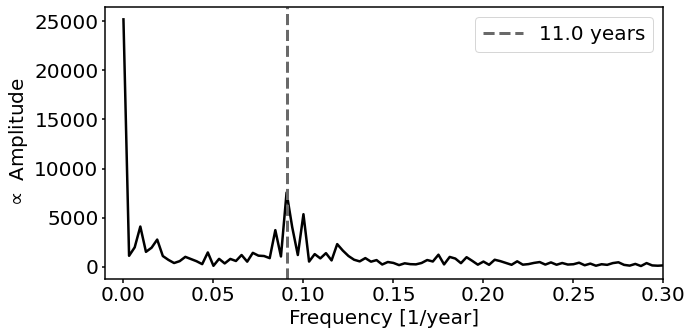

In [ ]:
fig = plt.figure(figsize = (10,5))
ax = fig.subplots()
ax.plot(fourier_freqs,fourier_amplitudes, linewidth = 2.5, color='k')

# Draw a dashed vertical line at the frequency corresponding to the dominant period, T:
ax.axvline(1/T, color = 'dimgrey', linestyle = 'dashed', linewidth = 3, label = '{:.1f} years'.format(T))

ax.legend()

ax.set_xlabel('Frequency [1/year]')

ax.set_ylabel(r'$\propto$ Amplitude')

ax.set_xlim(-0.01,0.3) # Not especially interesting stuff afterwards

plt.show()

Great! The vertical line that we have placed at $1/T_{dom}$ actually corresponds to the frequency having the greatest amplitude in our Fourier analysis. Well done!

##1g Conclusions

We have discovered for ourselves that the Sun has solar activity whose strenght varies on a 11-year cycle. From the plot we produced that shows the number of sunspots as a function of year, we see that we are currently lying in a low-activity period. Nevertheless, we are sure that the Sun will wake up in the following years, following this periodicity we have noticed.

Finally, it is worth pointing out that the Sun is also believed to cause changes in the climate of the Earth: scientist have measured how during low-activity periods, the energy that arrives to Earth from the Sun is lower. The latter seems to be associated with colder times in our planet. However, the global warming we have been experiencing in the last years is too large to be explained by the Sun only. In fact, as reported in [this](https://climate.nasa.gov/blog/2910/what-is-the-suns-role-in-climate-change/) NASA article: "Since 1750, the warming driven by greenhouse gases coming from the human burning of fossil fuels is over 50 times greater than the slight extra warming coming from the Sun itself over that same time interval." So it looks like we can't blame the Sun for something that's really the fault of human beings.

Note: The graph, below is "static", meaning in is not updated by running the code in this colab.

![](https://climate.nasa.gov/internal_resources/2167/)
Figure 2: Temperature change from 1880 onwards, as compared to the energy per unit area ("Solar irradiance") that arrives from the Sun to Earth. Figure sourced from https://climate.nasa.gov/blog/2910/what-is-the-suns-role-in-climate-change/; Credit: NASA/JPL-Caltech

